In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

Some ideas:
- statistical arbitrage
-

Resources:
- https://quantocracy.com/
- https://arxiv.org/ftp/arxiv/papers/1601/1601.00991.pdf


[*********************100%***********************]  1 of 1 completed


                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2022-01-03  1.137385  1.137592  1.128541  1.137346   1.137346       0
2022-01-04  1.130199  1.132300  1.127345  1.130224   1.130224       0
2022-01-05  1.128541  1.134559  1.127764  1.128363   1.128363       0
2022-01-06  1.131222  1.133067  1.128554  1.131350   1.131350       0
2022-01-07  1.129586  1.135976  1.129050  1.129688   1.129688       0


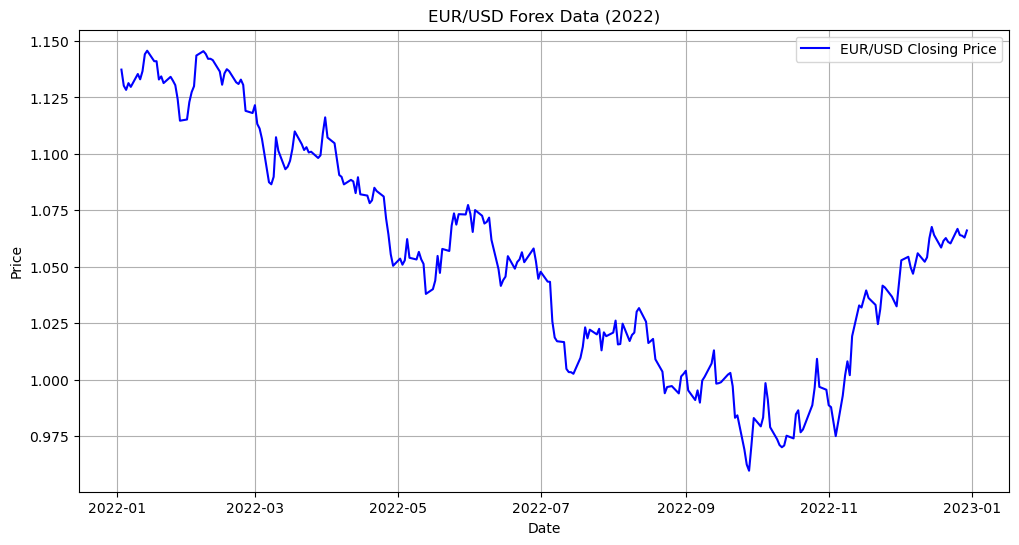

In [3]:
currency_pair = 'EURUSD=X'

# Download historical Forex data
forex_data = yf.download(currency_pair, start='2022-01-01', end='2023-01-01')

# Display the first few rows
print(forex_data.head())

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(forex_data['Close'], label='EUR/USD Closing Price', color='blue')
plt.title('EUR/USD Forex Data (2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

[*********************100%***********************]  2 of 2 completed
/Users/bx/opt/anaconda3/envs/qids/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005012. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/bx/opt/anaconda3/envs/qids/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000495. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting res

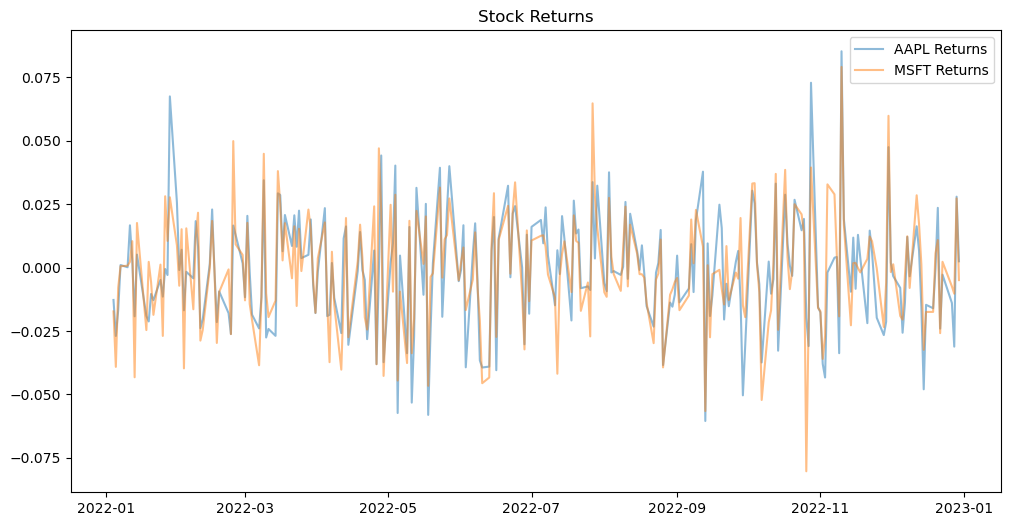

Predicted Volatility AAPL: 0.0004958071021488729
Predicted Volatility MSFT: 0.000513946311053235


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
import yfinance as yf

# Step 1: Collect Data
symbols = ['AAPL', 'MSFT']
data = yf.download(symbols, start='2022-01-01', end='2023-01-01')['Adj Close']
returns = np.log(data / data.shift(1)).dropna()

# Step 2: Fit Diagonal BEKK GARCH Model for each asset
# Fit GARCH model for each return series
aapl_model = arch_model(returns['AAPL'], vol='Garch', p=1, q=1, dist='normal')
msft_model = arch_model(returns['MSFT'], vol='Garch', p=1, q=1, dist='normal')

aapl_fit = aapl_model.fit(disp='off')
msft_fit = msft_model.fit(disp='off')

# Step 3: Forecast Volatility
aapl_forecast = aapl_fit.forecast(horizon=5)
msft_forecast = msft_fit.forecast(horizon=5)

predicted_volatility_aapl = aapl_forecast.variance.values[-1, 0]  # Get scalar value for AAPL
predicted_volatility_msft = msft_forecast.variance.values[-1, 0]  # Get scalar value for MSFT

# Step 4: Trading Strategy
# Example Strategy: Buy when predicted volatility is low
threshold_aapl = np.percentile(aapl_forecast.variance.values[-1], 25)  # Buy/Sell threshold
threshold_msft = np.percentile(msft_forecast.variance.values[-1], 25)

signals_aapl = (predicted_volatility_aapl < threshold_aapl).astype(int)  # 1 for buy, 0 for hold
signals_msft = (predicted_volatility_msft < threshold_msft).astype(int)

# Step 5: Visualization
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns['AAPL'], label='AAPL Returns', alpha=0.5)
plt.plot(returns.index, returns['MSFT'], label='MSFT Returns', alpha=0.5)
plt.title('Stock Returns')
plt.legend()
plt.show()

print('Predicted Volatility AAPL:', predicted_volatility_aapl)
print('Predicted Volatility MSFT:', predicted_volatility_msft)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime
import pandas as pd
import statsmodels.tsa.stattools as ts
from scipy.stats import linregress

def download_data(stock, start, end):
    stock_data = {}
    ticker = yf.download(stock, start,end, progress=False)
    stock_data['price'] = ticker['Adj Close']
    return pd.DataFrame(stock_data)

tick_list = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'ADA-USD', 'BNB-USD', 'XRP-USD', 'DOGE-USD', 'AVAX-USD', 'USDT-USD', 'USDC-USD', 'TON11419-USD', 'TRX-USD', 'LTC-USD', 'PEPE24478-USD', 'SUI20947-USD', 'FTM-USD', 'ONDO-USD', 'CKB-USD', 'STPT-USD', 'SHIB-USD', 'DOT-USD', 'LEO-USD', 'NEAR-USD', 'KAS-USD', 'UNI7083-USD']

if __name__ == '__main__':
    start_date = datetime.datetime(2024, 1,1)
    end_date = datetime.datetime(2024,9,1)

    for i in tick_list:
        for j in tick_list:
            if i != j:
                pair1 = download_data(i, start_date, end_date)
                pair2 = download_data(j, start_date, end_date)
                if np.shape(pair1) == np.shape(pair2):
                    result = linregress(pair1.values[:,0], pair2.values[:,0])
                    residuals = pair1 - result.slope * pair2 
                    adf = ts.adfuller(residuals)
                    if adf[0] < -3.4575505077947746: #Testing for which pairs are critical in 1% significance level
                        print(i, j, adf)

USDT-USD USDC-USD (np.float64(-4.756804230474831), np.float64(6.573554209829355e-05), 1, 242, {'1%': np.float64(-3.457664132155201), '5%': np.float64(-2.8735585105960224), '10%': np.float64(-2.5731749894132916)}, np.float64(-2949.361502137075))
USDT-USD PEPE24478-USD (np.float64(-4.7584351824514295), np.float64(6.526854356648913e-05), 1, 242, {'1%': np.float64(-3.457664132155201), '5%': np.float64(-2.8735585105960224), '10%': np.float64(-2.5731749894132916)}, np.float64(-2949.190529843549))
USDT-USD SHIB-USD (np.float64(-4.758422438941536), np.float64(6.527218012039039e-05), 1, 242, {'1%': np.float64(-3.457664132155201), '5%': np.float64(-2.8735585105960224), '10%': np.float64(-2.5731749894132916)}, np.float64(-2949.1909999727513))
USDC-USD USDT-USD (np.float64(-3.892412431280885), np.float64(0.002091402494332744), 3, 240, {'1%': np.float64(-3.4578942529658563), '5%': np.float64(-2.8736593200231484), '10%': np.float64(-2.573228767361111)}, np.float64(-3529.517581581083))
USDC-USD PEPE2